In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras
from keras import layers
import os
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from time import sleep


Using TensorFlow backend.


In [ ]:
path ='/content/drive/My Drive/utkface_aligned_cropped'
c=os.listdir(path+'/UTKFace')

In [ ]:
c[0]

'8_1_0_20170109202748999.jpg.chip.jpg'

In [ ]:

y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in c])
print(y.shape)
print(y[999])

(23718, 2, 1)
[['77']
 ['1']]


In [ ]:
len(c)

23718

In [ ]:
X_data =[]
cou = 0
for i in c:
  face = cv2.imread("drive/My Drive/utkface_aligned_cropped/UTKFace/"+i,cv2.IMREAD_COLOR)
  face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
  face =cv2.resize(face, (32,32) )
  X_data.append(face)
  cou=cou+1
  if cou%500==0:
    print("#",end="")
X_data=np.array(X_data)
X_data.shape

###############################################

(23718, 32, 32, 3)

In [ ]:
def imshow(img):
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

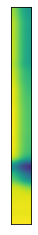

['8']


In [ ]:
X = np.squeeze(X_data)
imshow(X[10][5])
print(y[0][0])

In [ ]:
def gen_model():
    inputs = keras.layers.Input(shape=(32, 32, 3))
    x = inputs
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.Conv2D(32,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.Conv2D(64,3,activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(84,3,activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x1 = layers.Dense(64,activation='relu')(x)
    x2 = layers.Dense(64,activation='relu')(x)
    x1 = layers.Dense(1,activation='sigmoid',name='sex_out')(x1)
    x2 = layers.Dense(1,activation='relu',name='age_out')(x2)
    model = keras.models.Model(inputs=inputs, outputs=[x1, x2])
    model.compile(optimizer='Adam', loss=['binary_crossentropy','mae'])  
    return model
model=gen_model()

In [ ]:


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
y_train=[y_train[:,1],y_train[:,0]]
y_valid=[y_valid[:,1],y_valid[:,0]]



In [ ]:
import random
random_id=random.random()
model.summary()
callbacks = [
    keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
    keras.callbacks.TensorBoard(log_dir='./logs/'+str(random_id))
]
model.fit(X_train, y_train, epochs=2000,batch_size=240,validation_data=(X_valid,y_valid),callbacks=callbacks, shuffle=True)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 30, 30, 32)   896         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_58[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_55 (MaxPooling2D) (None, 14, 14, 32)   0           conv2d_59[0][0]                  
____________________________________________________________________________________________

In [ ]:
model.save('drive/My Drive/mAge_Gender_model.h5')

NameError: ignored

In [ ]:
new_model = keras.models.load_model('/content/drive/My Drive/23Age_Gender_model.h5')

In [ ]:
new_model.summary()

In [ ]:
model.evaluate(X_valid,y_valid)

In [ ]:
X_data =[]
face1 = cv2.imread("drive/My Drive/IMG_20160405_143352.jpg",cv2.IMREAD_COLOR)
face = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
face =cv2.resize(face, (32,32) )
X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(1, 32, 32, 3)

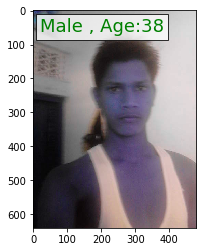

In [ ]:
prediction = new_model.predict(X_data, batch_size=None,steps=1) #gives all class prob.
v =int(prediction[1][0])
if(int((prediction[0][0])*10)==0):
    value ='Male , Age:%s'%(v)
    plt.text(20, 62,value,color='green',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='FeMale, Age:%s'%(v)
    plt.text(20, 62,value,color='green',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))


plt.imshow(face1)
plt.show()

In [ ]:
int((prediction[0][0])*10)

In [ ]:
# 0 means the default video capture device in OS
video_capture = cv2.VideoCapture(0)
# infinite loop, break by key ESC
while True:
    if not video_capture.isOpened():
        sleep(5)
    # Capture frame-by-frame
    ret, frame = video_capture.read()

In [ ]:
import cv2






image = cv2.imread('/content/drive/My Drive/IMG_20200228_091432.jpg',1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(60, 60)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', image)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

[INFO] Found 1 Faces.
[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True


In [ ]:
X_data =[]
face1 = cv2.imread("/content/107107_faces.jpg",cv2.IMREAD_COLOR)
face = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)
face =cv2.resize(face, (32,32) )
X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(1, 32, 32, 3)

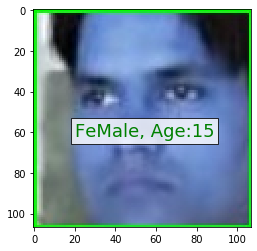

In [ ]:
prediction = new_model.predict(X_data, batch_size=None,steps=1) #gives all class prob.
v =int(prediction[1][0])
if(int((prediction[0][0])*10)<5):
    value ='Male , Age:%s'%(v)
    plt.text(20, 62,value,color='green',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='FeMale, Age:%s'%(v)
    plt.text(20, 62,value,color='green',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))


plt.imshow(face1)
plt.show()

In [ ]:
prediction

[array([[0.6204243]], dtype=float32), array([[6.252302]], dtype=float32)]

In [ ]:
new_model = keras.models.load_model('/content/drive/My Drive/23Age_Gender_model.h5')

In [ ]:

image = cv2.imread('/content/drive/My Drive/IMG20190919085420.jpg',1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(60, 60)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]

X_data =[]
face1 = cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB)
face =cv2.resize(face1, (32,32) )
X_data.append(face)
X_data=np.array(X_data)
X_data.shape

[INFO] Found 1 Faces.


(1, 32, 32, 3)

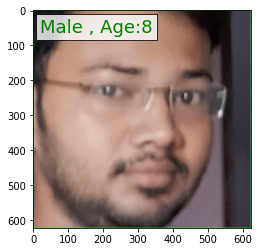

In [ ]:
prediction = new_model.predict(X_data, batch_size=None,steps=1) #gives all class prob.
v =int(prediction[1][0])
if(int((prediction[0][0])*10)<5):
    value ='Male , Age:%s'%(v)
    plt.text(20, 62,value,color='green',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='FeMale, Age:%s'%(v)
    plt.text(20, 62,value,color='green',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))


plt.imshow(face1)
plt.show()